In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Mounted at /content/drive


In [2]:
train = pd.read_csv('/content/drive/My Drive/Colab Notebooks/analytics/Big Mart Sales Prediction/train_v9rqX0R.csv')
test = pd.read_csv('/content/drive/My Drive/Colab Notebooks/analytics/Big Mart Sales Prediction/test_AbJTz2l.csv')
sample = pd.read_csv('/content/drive/My Drive/Colab Notebooks/analytics/Big Mart Sales Prediction/sample_submission_8RXa3c6.csv')

In [3]:
df = pd.concat([train , test])

In [4]:
df.shape

(14204, 12)

In [5]:
train.shape

(8523, 12)

In [6]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# Univariate Analysis - Numeric Variables

In [7]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8

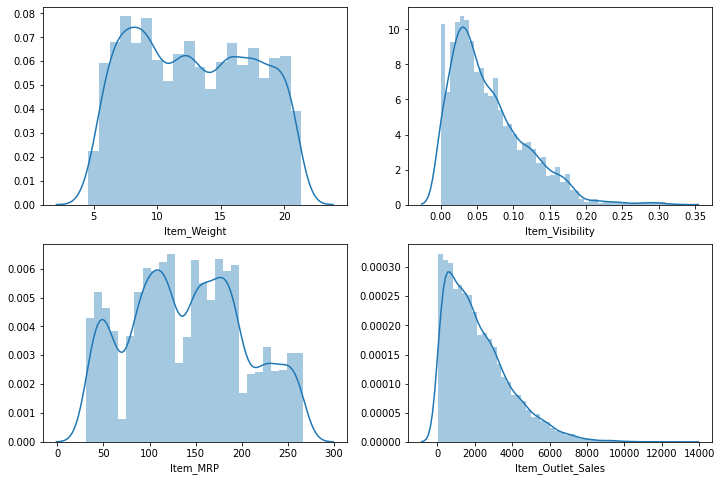

In [8]:
fig, axes = plt.subplots(2, 2)
ax0, ax1, ax2, ax3 = axes.flatten()
sns.distplot(train['Item_Weight'], ax=ax0)
sns.distplot(train['Item_Visibility'], ax=ax1)
sns.distplot(train['Item_MRP'], ax=ax2)
sns.distplot(train['Item_Outlet_Sales'], ax=ax3)

Few points to note here.

1. Item weight is in between 5 to 20 units
2. Item visibilty is right skewed as it have a long tail in right. We can take log value to make it normally distributed or we can do clipping that any thing above 0.2 will be 0.2 only.
3. Item_MRP have 4 different distributions as you can see.
4. Item_outlet_Sales which is our target variable also right skewed.

# Univariate Analysis - Categorical

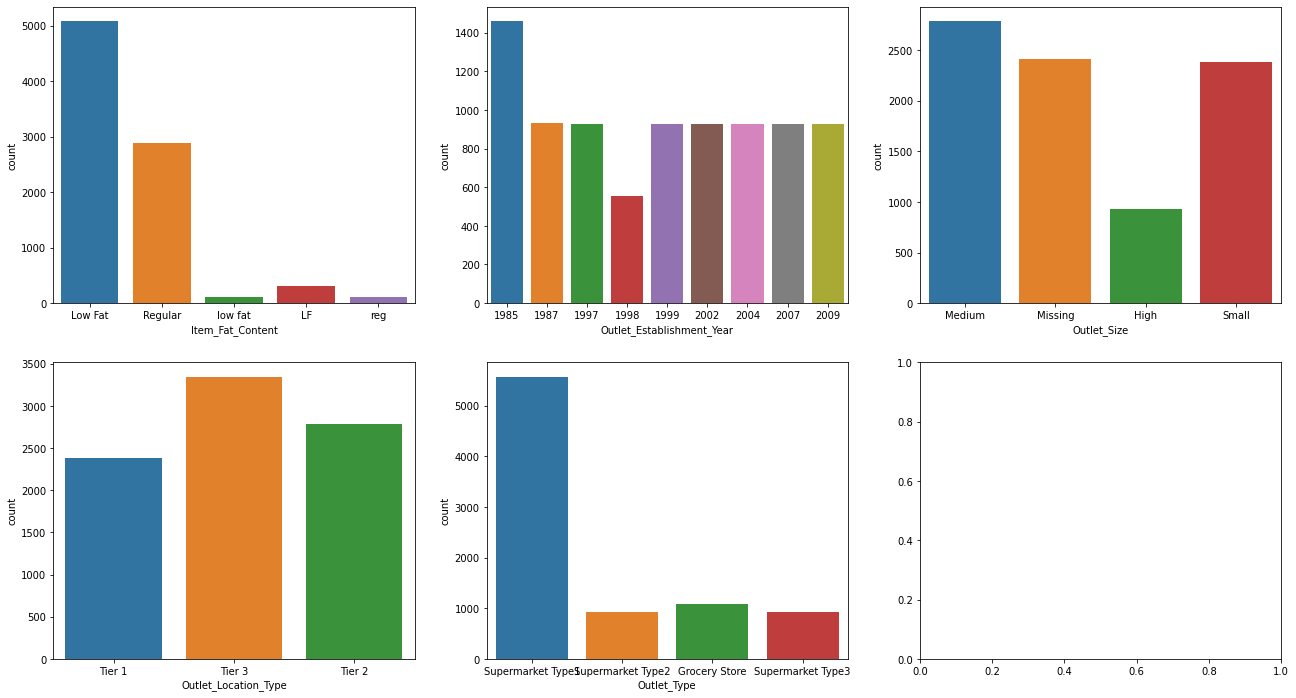

In [ ]:
rcParams['figure.figsize'] = 22, 12
fig, axes = plt.subplots(2, 3)
ax0, ax1, ax2, ax3, ax4, ax5 = axes.flatten()
sns.countplot(train['Item_Fat_Content'].fillna("Missing"), ax=ax0)
sns.countplot(train['Outlet_Establishment_Year'].fillna("Missing"), ax=ax1)
sns.countplot(train['Outlet_Size'].fillna("Missing"), ax=ax2)
sns.countplot(train['Outlet_Location_Type'].fillna("Missing"), ax=ax3)
sns.countplot(train['Outlet_Type'].fillna("Missing"), ax=ax4)

**Points to Note:**

1. In Item_Fat_Content Low Fat, low fat and LF is same thing and Regular and reg are same thing so we will combine them.
2. In the year 1998 least numeber of outlets were established.
3. There are many missing values in Outlet_Size variale.
4. Tier 3 cities have most numbers of Outlets.
5. Most stores or outlests are of Supermarket type1

In [9]:
def replace_fat_content(data):
  data['Item_Fat_Content'] = data['Item_Fat_Content'].replace(['low fat', 'LF'], 'Low Fat')
  data['Item_Fat_Content'] = data['Item_Fat_Content'].replace(['reg'], 'Regular')
  return data

In [10]:
train = replace_fat_content(train)
test = replace_fat_content(test)

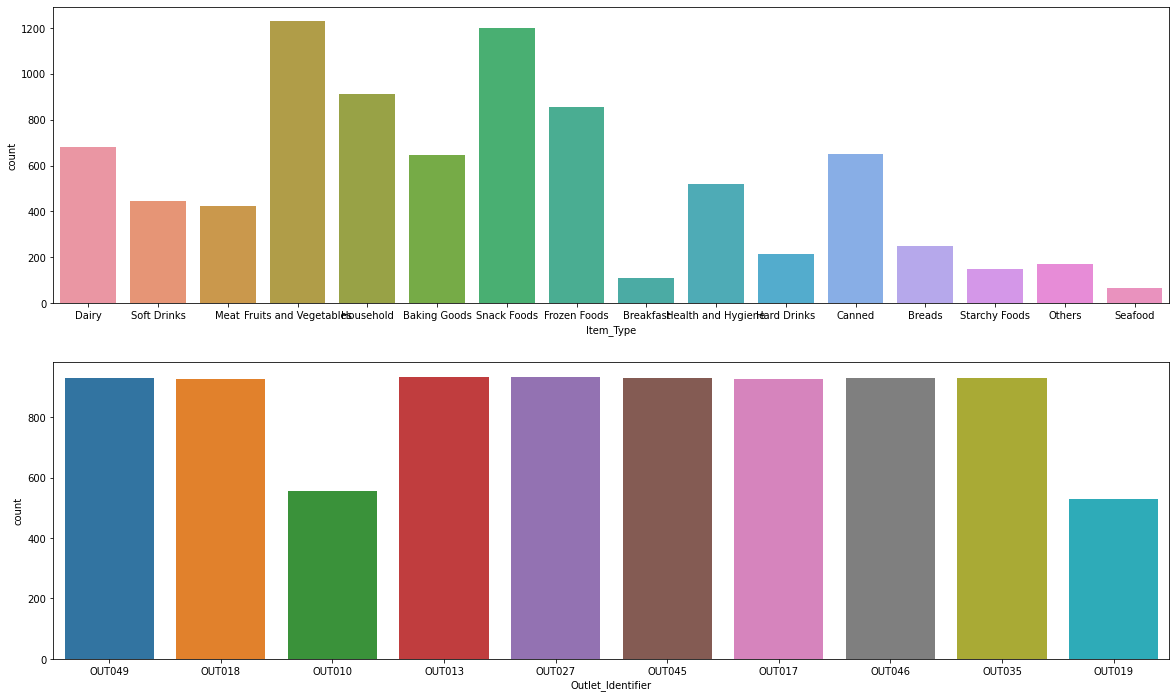

In [11]:
rcParams['figure.figsize'] = 20, 12
fig, axes = plt.subplots(2, 1)
ax0, ax1 = axes.flatten()
sns.countplot(train['Item_Type'].fillna("Missing"), ax=ax0)
sns.countplot(train['Outlet_Identifier'].fillna("Missing"), ax=ax1)


Fruits and vegetables, household and snack foods are 3 most demanded item types.


# Bivariate Analysis - Numeric

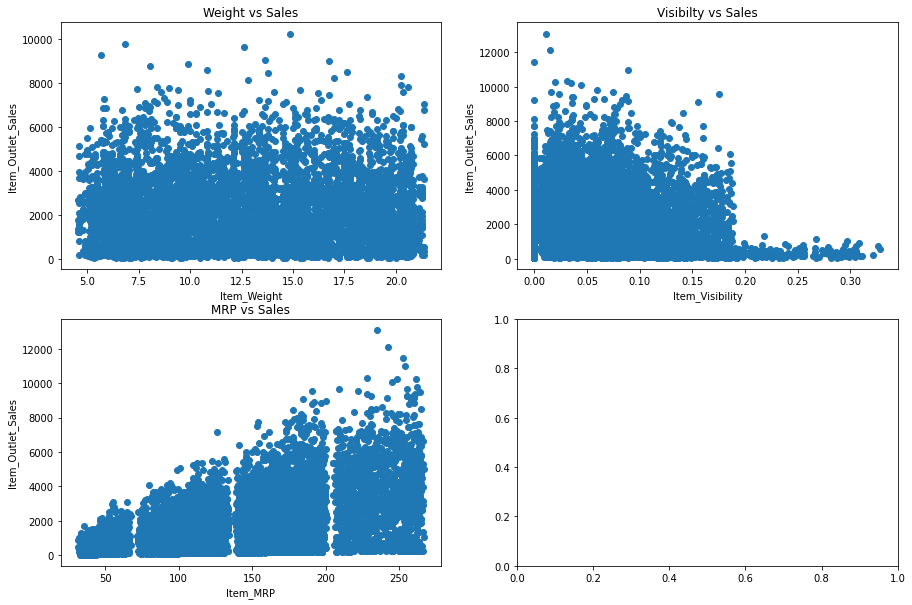

In [12]:
rcParams['figure.figsize'] = 15, 10
fig, axes = plt.subplots(2, 2)
ax0, ax1, ax2, ax3 = axes.flatten()
ax0.scatter(train['Item_Weight'], train['Item_Outlet_Sales'])
ax0.set_xlabel('Item_Weight')
ax0.set_ylabel('Item_Outlet_Sales')
ax0.set_title('Weight vs Sales')
ax1.scatter(train['Item_Visibility'], train['Item_Outlet_Sales'])
ax1.set_xlabel("Item_Visibility"), ax1.set_ylabel("Item_Outlet_Sales")
ax1.set_title("Visibilty vs Sales")
ax2.scatter(train['Item_MRP'], train['Item_Outlet_Sales'])
ax2.set_xlabel("Item_MRP"), ax2.set_ylabel("Item_Outlet_Sales")
ax2.set_title("MRP vs Sales")
plt.show()

**Note:**
1. Item_Weight is very evenly distributed doesn't show any pattern.
2. Item_Visibilty can't be zero but in plot we can see many sales on zero visibilty. One more interesting pattern is when visibilty is greater than somewhat 0.18 then number of sales is less than 2000 which is odd as we know more visible products have more chance to getting sold.
3. Higher the MRP of Item more the number of sales this is also an interesting pattern. Also there are 4 different segments which can be used to create a new variable.

# Bivariate Analysis - categorical

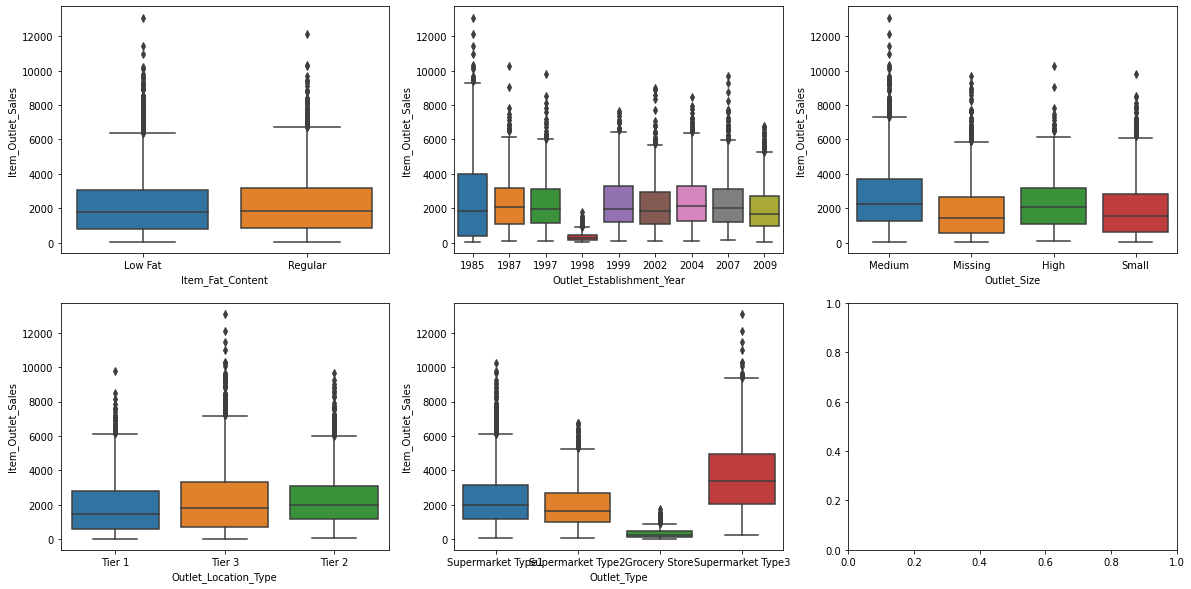

In [13]:
rcParams['figure.figsize'] = 20, 10
fig, axes = plt.subplots(2, 3)
ax0, ax1, ax2, ax3, ax4, ax5 = axes.flatten()
sns.boxplot(train['Item_Fat_Content'], train['Item_Outlet_Sales'], ax=ax0)
sns.boxplot(train['Outlet_Establishment_Year'].fillna("Missing"), train['Item_Outlet_Sales'], ax=ax1)
sns.boxplot(train['Outlet_Size'].fillna("Missing"), train['Item_Outlet_Sales'], ax=ax2)
sns.boxplot(train['Outlet_Location_Type'].fillna("Missing"), train['Item_Outlet_Sales'], ax=ax3)
sns.boxplot(train['Outlet_Type'].fillna("Missing"), train['Item_Outlet_Sales'], ax=ax4)

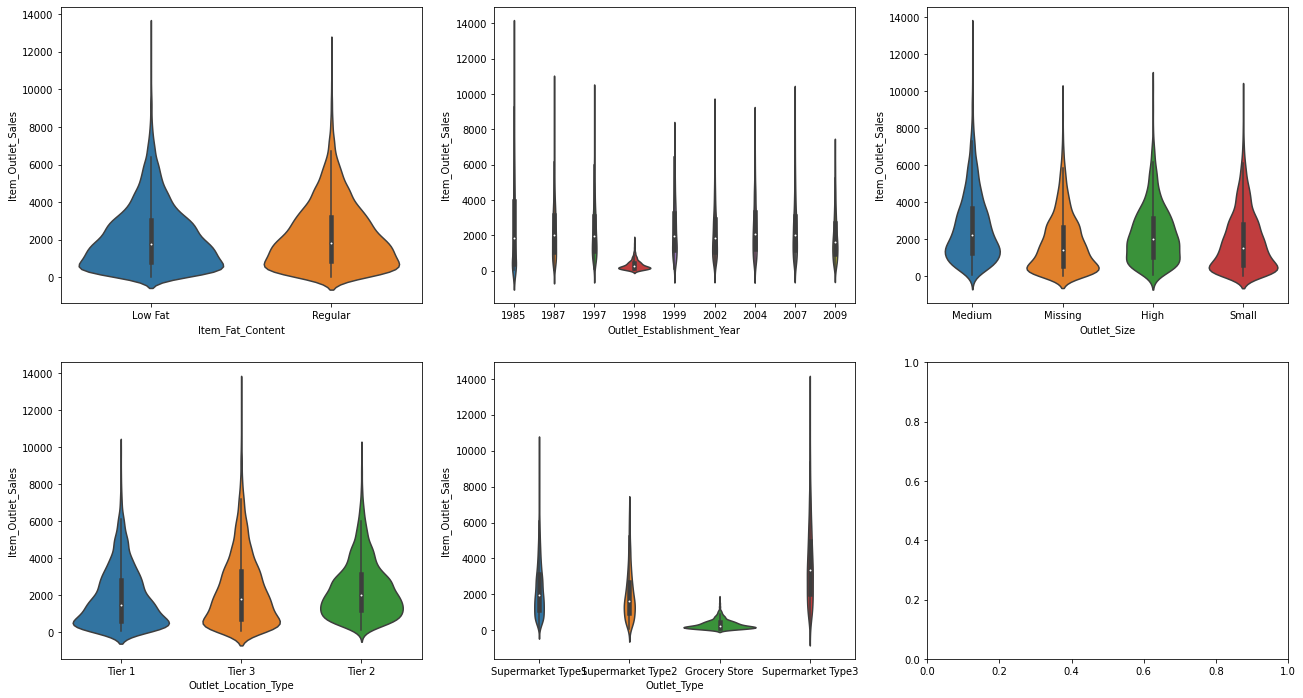

In [14]:
rcParams['figure.figsize'] = 22, 12
fig, axes = plt.subplots(2, 3)
ax0, ax1, ax2, ax3, ax4, ax5 = axes.flatten()
sns.violinplot(train['Item_Fat_Content'].fillna("Missing"), train['Item_Outlet_Sales'], ax=ax0)
sns.violinplot(train['Outlet_Establishment_Year'].fillna("Missing"), train['Item_Outlet_Sales'], ax=ax1)
sns.violinplot(train['Outlet_Size'].fillna("Missing"), train['Item_Outlet_Sales'], ax=ax2)
sns.violinplot(train['Outlet_Location_Type'].fillna("Missing"), train['Item_Outlet_Sales'], ax=ax3)
sns.violinplot(train['Outlet_Type'].fillna("Missing"), train['Item_Outlet_Sales'], ax=ax4)

**Note: From the above plots we can observe few things like**
1. Year 1998 had very low sales range i.e below 2500.
2. In Outlet_Size missing values has the same distribution as small. That means we can actually replace missing values with small size.
3. Tier 3 city has highest sales range followed by Tier2, Tier1. It seems like Tier 3 city is a metro city.
4. Grocery Store has very low sales range again below 3000. Whereas Supermarket type 3 has highest sales range followed by supermarket type1 and supermarket type2.

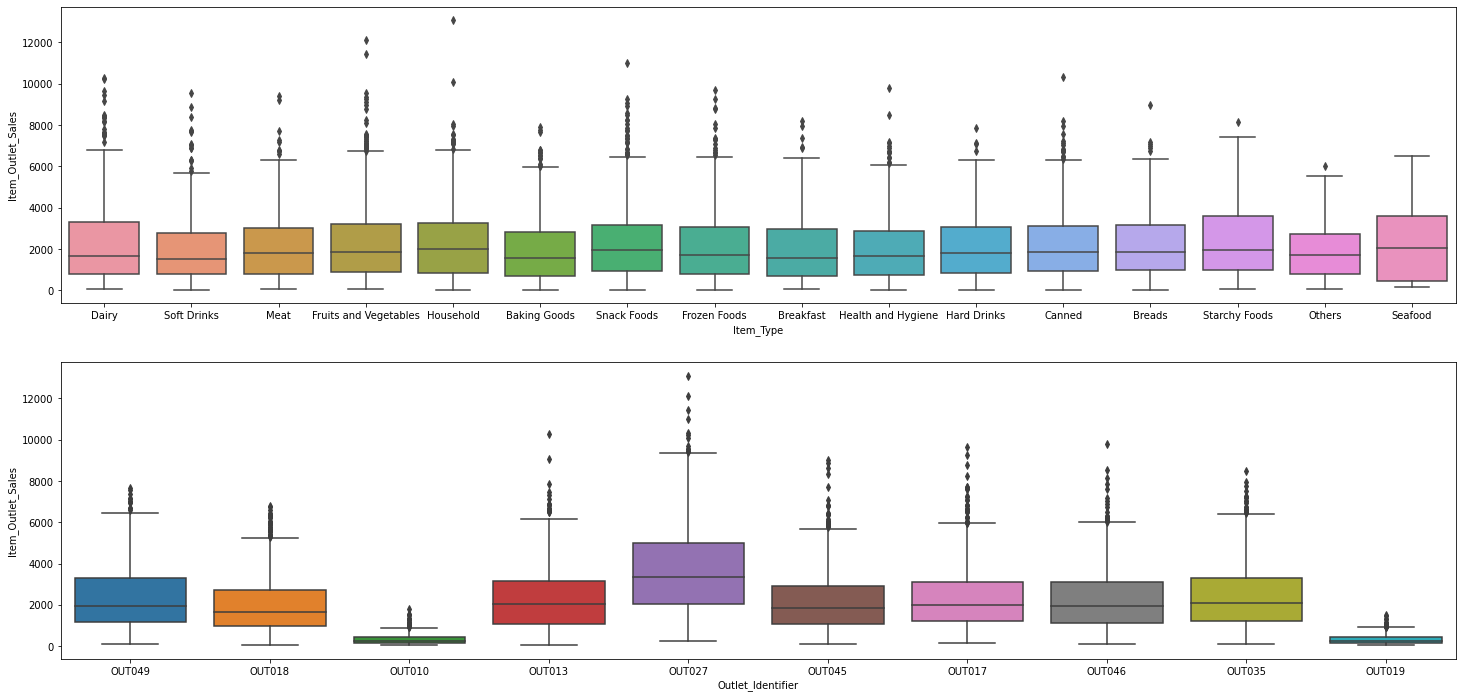

In [15]:
rcParams['figure.figsize'] = 25, 12
fig, axes = plt.subplots(2, 1)
ax0, ax1 = axes.flatten()
sns.boxplot(train['Item_Type'].fillna("Missing"), train['Item_Outlet_Sales'], ax=ax0)
sns.boxplot(train['Outlet_Identifier'].fillna("Missing"), train['Item_Outlet_Sales'], ax=ax1)

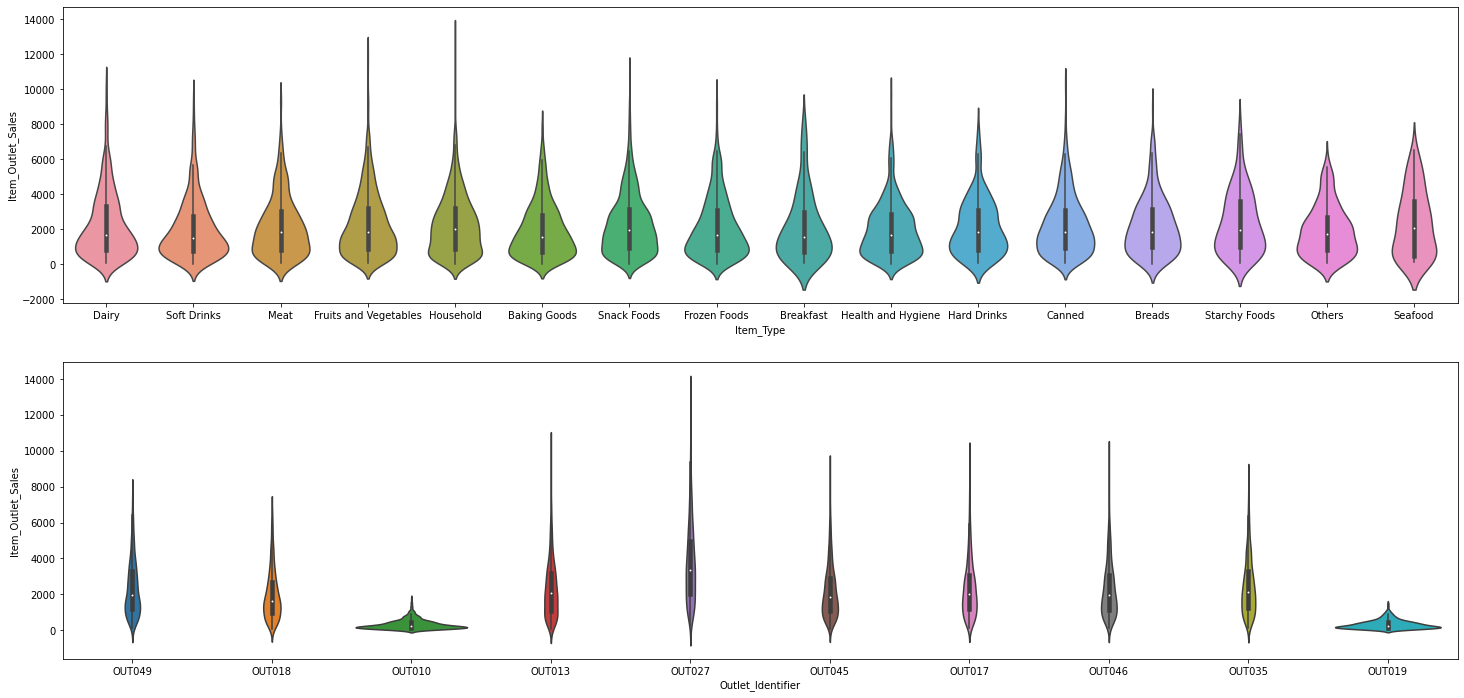

In [16]:
rcParams['figure.figsize'] = 25, 12
fig, axes = plt.subplots(2, 1)
ax0, ax1 = axes.flatten()
sns.violinplot(train['Item_Type'].fillna("Missing"), train['Item_Outlet_Sales'], ax=ax0)
sns.violinplot(train['Outlet_Identifier'].fillna("Missing"), train['Item_Outlet_Sales'], ax=ax1)

**Note:**
1. Item_Type have similar sales distribution across all types.
2. OUT010 and OUT019 have similar distribution and they are also having lowest range of sales.

# Missing value Imputation

In [17]:
train.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

As we can see Item_Weight has 1463 missing values and outlet_size has 2410 missing value. We can impute Item_Weight using mean or median and Outlet_Size can be imputed by using mode or simply replacing with small because it has similar distribution to small size as we discussed in boxplot and violin plot. One more important thing we can not see any missing values in Item_Visibilty but there are many zeros in this feature but visibilty can not be zero as we have discussed in "Visibilty vs Sales" scatter plot. we can also impute this using mean or median value.

In [18]:
train['Item_Visibility'].value_counts()

0.000000    526
0.076975      3
0.041283      2
0.085622      2
0.187841      2
           ... 
0.092576      1
0.067544      1
0.115168      1
0.146896      1
0.050902      1
Name: Item_Visibility, Length: 7880, dtype: int64

Here you can see 526 zeros in Item_Visibilty.

In [19]:
def Impute_Missing(data):
  data['Item_Weight'] = data['Item_Weight'].fillna(data['Item_Weight'].mean())
  data['Outlet_Size'] = data['Outlet_Size'].fillna(data['Outlet_Size'].mode()[0])
  data['Item_Visibility'] = data['Item_Visibility'].replace(0, data['Item_Visibility'].mean())
  return data

In [20]:
train = Impute_Missing(train)
test = Impute_Missing(test)

So, we used mean to impute missing values in continuous variable and simply replaced "nan" with 'Small' in Outlet_Size feature. Now let's check again if we have any missing values.

In [21]:
train.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [22]:
train['Item_Visibility'].value_counts()

0.066132    526
0.076975      3
0.096592      2
0.104784      2
0.058919      2
           ... 
0.067544      1
0.115168      1
0.146896      1
0.081119      1
0.037218      1
Name: Item_Visibility, Length: 7880, dtype: int64

Alright! Now we don't have any "nan" value in Item_weight and Outlet_Size also there are no "zeros" in Item_Visibility.

# Feature Engineering

In [23]:
print(train[['Item_Identifier', 'Item_Type', 'Item_Fat_Content']].iloc[0:10],"\n", train[['Item_Identifier', 'Item_Type', 'Item_Fat_Content']].iloc[-10:-1])

  Item_Identifier              Item_Type Item_Fat_Content
0           FDA15                  Dairy          Low Fat
1           DRC01            Soft Drinks          Regular
2           FDN15                   Meat          Low Fat
3           FDX07  Fruits and Vegetables          Regular
4           NCD19              Household          Low Fat
5           FDP36           Baking Goods          Regular
6           FDO10            Snack Foods          Regular
7           FDP10            Snack Foods          Low Fat
8           FDH17           Frozen Foods          Regular
9           FDU28           Frozen Foods          Regular 
      Item_Identifier           Item_Type Item_Fat_Content
8513           FDH31                Meat          Regular
8514           FDA01              Canned          Regular
8515           FDH24        Baking Goods          Low Fat
8516           NCJ19              Others          Low Fat
8517           FDF53        Frozen Foods          Regular
8518        

1. If you will look at "Item_Identifier" variable closely you will find out that all items are starting with FD, DR or NC. It looks like FD is for Food, DR for drink and NC stands for Non-Consumable probably other household products. So, let's create another variable Item_Code which will have 3 values FD, DR and NC. Observe one more thing that Item Identifier starting with NC have Fat value but Non-Consumable products can not have any fat.

2. Now we willl make another variable which shows MRP of Item per Weight unit.

3. We have establishment year of the outlet so we can get number of years since an outlet is operable.

4. As we have seen in analysis of numeric variables, "Item_MRP" had 4 different distributions. We can make these 4 different bins as a category in a new variable.

5. We can make another variable from Item_Type that is we can make 2 categories fresh items and packed items.

In [31]:
def feature_engineering(data):
  Item_Code = [] 
  for i in range(len(data)):
    code = data['Item_Identifier'].iloc[i][0:2]
    Item_Code.append(code)
    if code == 'NC':
      data['Item_Fat_Content'].iloc[i] = 'Non-Edible'
  data['Item_Code'] = Item_Code
  data['MRP/Weight'] = data['Item_MRP'] / data['Item_Weight'] # MRP of the item per unit weight.
  data['MRP_Visibility'] = data['Item_MRP'] / data['Item_Visibility'] #MRP of the item by visibilty
  data['Weight_Visibility'] = data['Item_Visibility'] / data['Item_Weight'] #Visbility by per unit weight
  data['MRP/Weight/Visibility'] = data['Item_MRP'] / (data['Item_Weight']/data['Item_Visibility']) # 
  data['Outlet_Operation_Years'] = 2020 - data['Outlet_Establishment_Year'] # Number of years since outlet has been operational.
  data['Item_MRP_bins'] = data['Item_MRP'].copy()
  data['Item_MRP_bins'] = data['Item_MRP_bins'].apply(lambda x: 0 if x<70 else(1 if x<140 else(2 if x<200 else 3))) # Binnig Item_MRP
  data['Item_Category'] = data['Item_Type'].copy()
  data['Item_Category'] = data['Item_Category'].replace(['Dairy', 'Meat', 'Fruits and Vegetables', 'Breakfast', 'Breads', 'Seafood'], 'Perishable') #Replacing fresh foods with Perishable.
  data['Item_Category'] = data['Item_Category'].replace(['Soft Drinks', 'Household', 'Baking Goods', 'Frozen Foods', 'Health and Hygiene', 'Hard Drinks', 'Canned'], 'Non-Perishable')#replacing Packed foods and households into non-perishable.
  data['Item_Category'] = data['Item_Category'].replace(['Starchy Foods', 'Snack Foods', 'Others'], "Unsure") # replacing everthing else with Unsure

  data['num_item_per_outlet'] = data.groupby('Outlet_Identifier')['Item_Identifier'].transform('count') #number of items per outlet
  data['num_item_per_type'] = data.groupby('Item_Type')['Item_Identifier'].transform('count') # number of items per item type
  data['num_outlet_per_location'] = data.groupby('Outlet_Location_Type')['Outlet_Identifier'].transform('count') # number of outlets per location

  return data

In [32]:
#train_copy = train.copy()
#test_copy = test.copy()
train = train_copy.copy()
test = test_copy.copy()

In [33]:
train = feature_engineering(train)
test = feature_engineering(test)

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [34]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Code,MRP/Weight,MRP_Visibility,Weight_Visibility,MRP/Weight/Visibility,Outlet_Operation_Years,Item_MRP_bins,Item_Category,num_item_per_outlet,num_item_per_type,num_outlet_per_location
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FD,26.861204,15567.053924,0.001726,0.431050,21,3,Perishable,930,682,2388
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,DR,8.153581,2503.820893,0.003256,0.157186,11,0,Non-Perishable,928,445,3350
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,FD,8.092457,8449.723525,0.000958,0.135630,21,2,Perishable,930,425,2388
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,FD,9.484115,2753.506937,0.003444,0.627204,22,2,Perishable,555,1232,3350
4,NCD19,8.93,Non-Edible,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,NC,6.031512,814.452558,0.007406,0.398876,33,0,Non-Perishable,932,910,3350


**Let's visualize the new variabes we have created.**

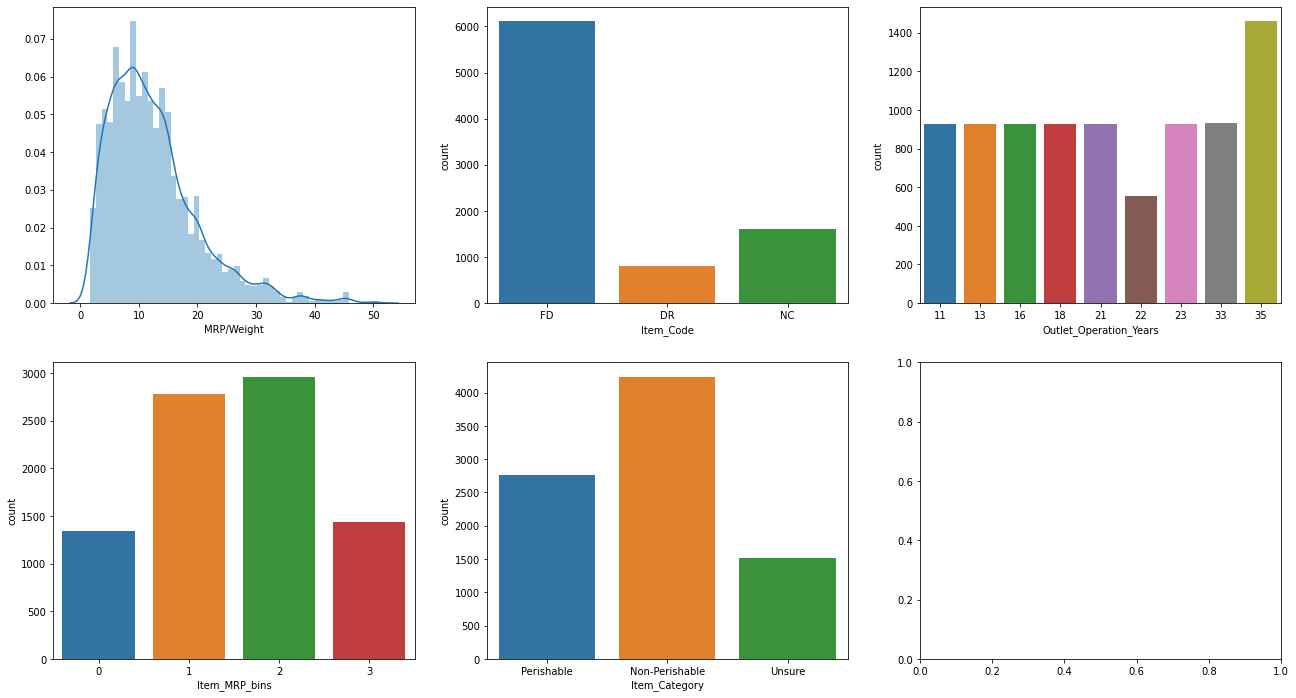

In [30]:
rcParams['figure.figsize'] = 22, 12
fig, axes = plt.subplots(2, 3)
ax0, ax1, ax2, ax3, ax4, ax5 = axes.flatten()
sns.distplot(train['MRP/Weight'], ax=ax0)
sns.countplot(train['Item_Code'], ax=ax1)
sns.countplot(train['Outlet_Operation_Years'], ax=ax2)
sns.countplot(train['Item_MRP_bins'], ax=ax3)
sns.countplot(train['Item_Category'], ax=ax4)
#sns.distplot(train['Weight_Visibility'], ax=ax5)

**Points to note:**
1. MRP/Weight and Weight_Visibility are also right skewed and have a long tail. 
2. More than 6000 items are food product as we can see FD count in Item_Code.
3. There are more than 1400 outlets that were built 35 years ago.
4. Most Item_MRP consist in between 70 to 200. 1 represents 70-140 and 2 represents 140-200 in Item_MRP_bins.
5. Most of the Items in outlet are of Non-perishable category as you can see in Item_Category plot.

Text(0, 0.5, 'Item_Outlet_Sales')

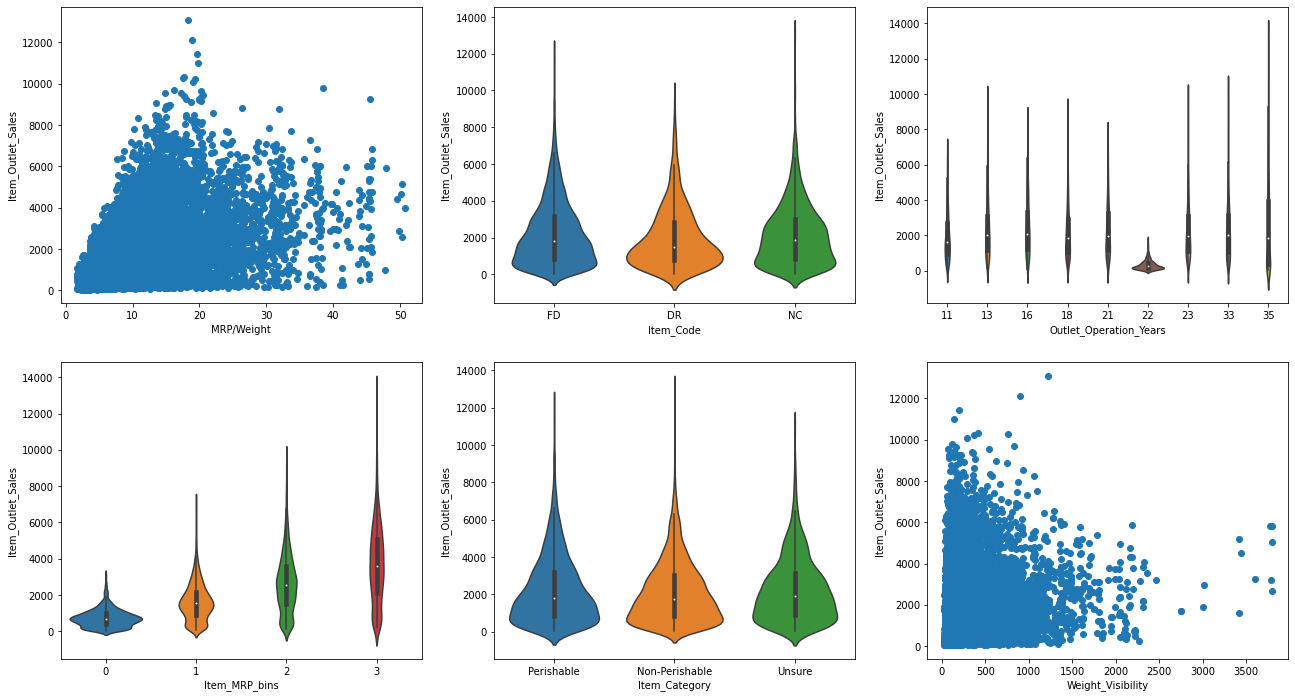

In [ ]:
rcParams['figure.figsize'] = 22, 12
fig, axes = plt.subplots(2, 3)
ax0, ax1, ax2, ax3, ax4, ax5 = axes.flatten()
ax0.scatter(train['MRP/Weight'], train['Item_Outlet_Sales'])
ax0.set_xlabel('MRP/Weight')
ax0.set_ylabel('Item_Outlet_Sales')
sns.violinplot(train['Item_Code'], train['Item_Outlet_Sales'], ax=ax1)
sns.violinplot(train['Outlet_Operation_Years'], train['Item_Outlet_Sales'], ax=ax2)
sns.violinplot(train['Item_MRP_bins'], train['Item_Outlet_Sales'], ax=ax3)
sns.violinplot(train['Item_Category'], train['Item_Outlet_Sales'], ax=ax4)
ax5.scatter(train['Weight_Visibility'], train['Item_Outlet_Sales'])
ax5.set_xlabel('Weight_Visibility')
ax5.set_ylabel('Item_Outlet_Sales')

**Note:**
1. Highest numbers of sales are around MRP/Weight 20.
2. Outlets built 22 years ago is having least distribution of Item sales.
3. Items with price less than 70 has lowest sales distributoin i.e less than 4000 and items with price greater than 200 has highest sales ditribution.


# Preprocessing

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  Item_Code                  8523 non-null   object 
 13  MRP/Weight                 8523 non-null   float

In [ ]:
#train_copy = train.copy()
#test_copy = test.copy()
train = train_copy.copy()
test = test_copy.copy()

In [35]:
def z_score(df):
  mean = df.mean()
  std = df.std()
  df = (df - mean)/std
  return df

In [37]:
def preprocess(data, train=False):
  cols = ['Item_Fat_Content', 'Item_Category', 'Item_MRP_bins', 'Outlet_Identifier',
          'Outlet_Size', 'Item_Code', 'Outlet_Location_Type', 'Outlet_Type', 'Item_Type', 'Outlet_Operation_Years']
  data = pd.get_dummies(data, columns=cols)

  data['Item_Visibility'] = z_score(np.log(data['Item_Visibility']))
  data['MRP/Weight'] = z_score(np.log(data['MRP/Weight']))
  data['Weight_Visibility'] = z_score(np.log(data['Weight_Visibility']))
  data['MRP_Visibility'] = z_score(np.log(data['MRP_Visibility']))
  data['Item_Weight'] = z_score(data['Item_Weight'])
  data['Item_MRP'] = z_score(np.log(data['Item_MRP']))
  
  data['num_item_per_outlet'] = z_score(data['num_item_per_outlet'])
  data['num_item_per_type'] = z_score(data['num_item_per_type'])
  data['num_outlet_per_location'] = z_score(data['num_outlet_per_location'])


  drop_cols = ['Outlet_Establishment_Year']
  data.drop(columns=drop_cols, axis=1, inplace=True)

  return  data

In [38]:
train = preprocess(train)

In [39]:
train.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,MRP/Weight,MRP_Visibility,Weight_Visibility,MRP/Weight/Visibility,num_item_per_outlet,num_item_per_type,num_outlet_per_location,Item_Fat_Content_Low Fat,Item_Fat_Content_Non-Edible,Item_Fat_Content_Regular,Item_Category_Non-Perishable,Item_Category_Perishable,Item_Category_Unsure,Item_MRP_bins_0,Item_MRP_bins_1,Item_MRP_bins_2,Item_MRP_bins_3,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Item_Code_DR,Item_Code_FD,Item_Code_NC,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Operation_Years_11,Outlet_Operation_Years_13,Outlet_Operation_Years_16,Outlet_Operation_Years_18,Outlet_Operation_Years_21,Outlet_Operation_Years_22,Outlet_Operation_Years_23,Outlet_Operation_Years_33,Outlet_Operation_Years_35
0,FDA15,-0.841822,-1.594233,1.316327,3735.1380,1.514151,2.050056,-1.125715,0.431050,0.381129,-0.287373,-1.280195,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,DRC01,-1.641610,-1.354362,-1.808388,443.4228,-0.373701,0.090427,-0.377412,0.157186,0.365673,-0.981135,1.144861,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
2,FDN15,1.098490,-1.537404,0.237507,2097.2700,-0.385616,1.394798,-1.819365,0.135630,0.381129,-1.039680,-1.280195,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,FDX07,1.500750,0.257567,0.715356,732.3800,-0.134342,0.192366,-0.311309,0.627204,-2.516909,1.322624,1.144861,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,NCD19,-0.929373,0.257567,-1.600023,994.7052,-0.851052,-1.113934,0.590611,0.398876,0.396585,0.380044,1.144861,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


# Outlier Analysis

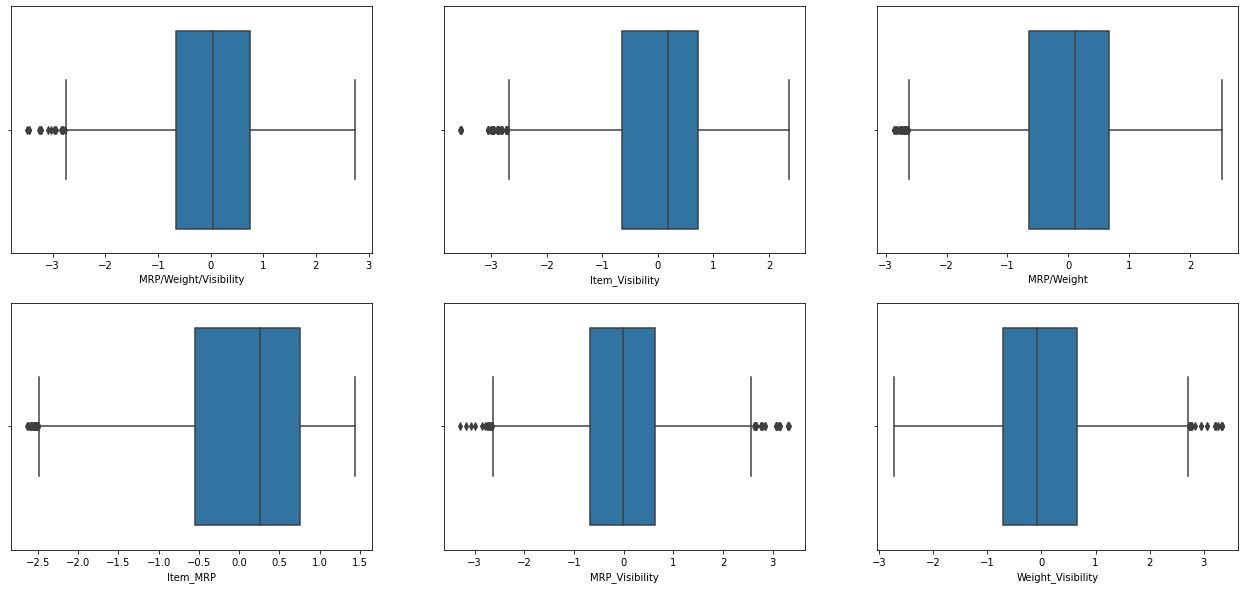

In [ ]:
rcParams['figure.figsize'] = 22, 10
fig, axes = plt.subplots(2, 3)
ax0, ax1, ax2, ax3, ax4, ax5 = axes.flatten()
sns.boxplot(x=train['MRP/Weight/Visibility'], ax=ax0)
sns.boxplot(x = train['Item_Visibility'], ax=ax1)
sns.boxplot(x = train['MRP/Weight'], ax=ax2)
sns.boxplot(x = train['Item_MRP'], ax=ax3)
sns.boxplot(x = train['MRP_Visibility'], ax=ax4)
sns.boxplot(x = train['Weight_Visibility'], ax=ax5)
plt.show()

In [40]:
def remove_outlier(data, column):
  mean = data[column].mean()
  std = data[column].std()
  Z_score = (data[column] - mean) / std
  data = data[(data[column]- mean)/std <= 2.7] # considering anything less than 2.7 * z score as outlier
  data = data[(data[column]- mean)/std >= -2.7] # considering anything greater than 2.7 * z score as outlier
  return data

In [41]:
train.shape

(8523, 70)

In [42]:
train = remove_outlier(train, 'Item_Visibility')
train = remove_outlier(train, 'MRP/Weight')
train = remove_outlier(train, 'Item_MRP')
train = remove_outlier(train, 'Weight_Visibility')

In [43]:
train.shape

(8412, 70)

Alright! Now We have our data ready for feeding into model.
Let's look at the distribution of Item_Visibility and MRP/Weight after applying transformations.

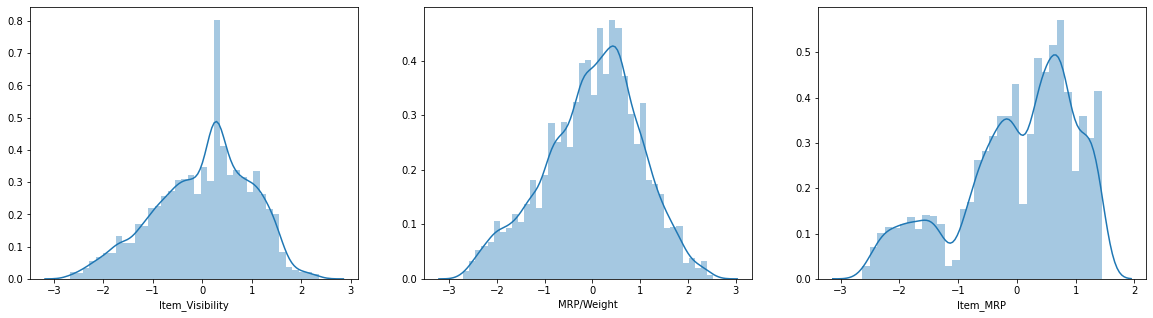

In [ ]:
rcParams['figure.figsize'] = 20, 5
fig, axes = plt.subplots(1, 3)
ax0, ax1, ax2 = axes.flatten()
sns.distplot(train['Item_Visibility'], ax=ax0)
sns.distplot(train['MRP/Weight'], ax=ax1)
sns.distplot(train['Item_MRP'], ax=ax2)

Well, look at the plot now and compare it  with the previous plots. You can see that now we are getting "Bell Curve" distribution that means our data is normally distributed.

# Model

In [46]:
from scipy.stats import loguniform
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor, plot_tree, plot_importance

from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor

In [59]:
def cross_val_acc(est, X, Y):
  '''
  Calculating RMSE on kfold
  '''
  kf = KFold(shuffle=True, n_splits=5)
  rmse = cross_val_score(estimator = est, X = X, y = Y, cv = kf,scoring='neg_mean_squared_error')
  print("RMSE Score Mean KFold: %2f" %np.sqrt((-1 * rmse).mean()))
  print("RMSE Std: %4f" %np.sqrt((-1 * rmse).std()))

In [48]:
#df_dummy = df.copy()
df = df_dummy.copy()

In [49]:
df = replace_fat_content(df)
df = Impute_Missing(df)
df = feature_engineering(df)
Item_Outlier = df['Outlet_Identifier']
df = preprocess(df)
df['Outlet_Identifier'] = Item_Outlier

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [50]:
train_pp = df[df['Item_Outlet_Sales'].isna() == False]
test_pp = df[df['Item_Outlet_Sales'].isna() == True]

In [51]:
print("Shape of train: ", train_pp.shape, "\n", "Test Shape: ", test_pp.shape)

Shape of train:  (8523, 71) 
 Test Shape:  (5681, 71)


In [52]:
train_pp = remove_outlier(train_pp, 'Item_Visibility')
train_pp = remove_outlier(train_pp, 'MRP/Weight')
train_pp = remove_outlier(train_pp, 'Item_MRP')
train_pp = remove_outlier(train_pp, 'MRP_Visibility')
train_pp = remove_outlier(train_pp, 'Weight_Visibility')

In [53]:
X = train_pp.drop(columns=['Item_Identifier', 'Outlet_Identifier', 'Item_Outlet_Sales'], axis=1)
y = train_pp['Item_Outlet_Sales']

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [62]:
lr = LinearRegression()
lr.fit(X_train, y_train)
print(cross_val_acc(lr, X_train, y_train))
print("RMSE on test set: ", np.sqrt(mean_squared_error(y_test, lr.predict(X_test))))

RMSE Score Mean KFold: 1174.888380
RMSE Std: 345.332846
None
RMSE on test set:  1084.1363403986006


In [61]:
xgbr = XGBRegressor()
xgbr.fit(X_train, y_train)
print(cross_val_acc(xgbr, X_train, y_train))
print("RMSE on test set: ", np.sqrt(mean_squared_error(y_test, xgbr.predict(X_test))))

[07:15:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:15:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:15:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:15:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:15:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:15:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE Score Mean KFold: 1095.639337
RMSE Std: 300.055428
None
RMSE on test set:  1027.436315541638


In [58]:
xgbr = XGBRegressor()
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07, 0.1], #so called `eta` value
              'max_depth': [3, 5, 6, 7, 10],
              'min_child_weight': [4],
              'subsample': [0.7, 0.8, 0.9, 1.0],
              'colsample_bytree': [0.7, 0.8, 0.9],
              'n_estimators': [100]}

xgb_grid = GridSearchCV(xgbr,
                        parameters,
                        cv = 2,
                        n_jobs = 5,
                        verbose=True)

xgb_grid.fit(X_train,
         y_train)

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

Fitting 2 folds for each of 240 candidates, totalling 480 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   50.2s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  3.6min
[Parallel(n_jobs=5)]: Done 440 tasks      | elapsed:  9.1min
[Parallel(n_jobs=5)]: Done 480 out of 480 | elapsed:  9.9min finished


[07:14:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.5933968804477189
{'colsample_bytree': 0.9, 'learning_rate': 0.05, 'max_depth': 3, 'min_child_weight': 4, 'n_estimators': 100, 'nthread': 4, 'objective': 'reg:linear', 'subsample': 0.8}


In [60]:
print(cross_val_acc(xgb_grid.best_estimator_, X_train, y_train))
print("RMSE on test set: ", np.sqrt(mean_squared_error(y_test, xgb_grid.best_estimator_.predict(X_test))))

[07:15:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:15:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:15:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:15:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:15:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE Score Mean KFold: 1089.529357
RMSE Std: 201.955758
None
RMSE on test set:  1031.6562206276888


 **Model Selection:**
When we tested our RMSE score on k fold splits XGBRegressor gave us the best RMSE mean on K folds. It also gave best RMSE std. Hence we will select this model for predicting on new data.

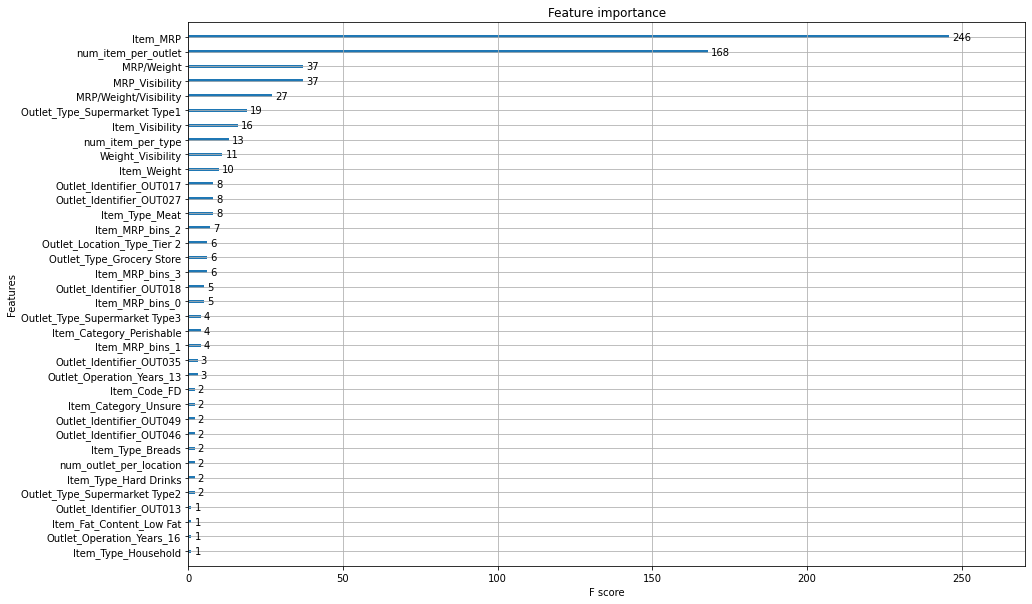

In [63]:
rcParams['figure.figsize'] = 15, 10
plot_importance(xgb_grid.best_estimator_)

**Feature Importance:**
Look at the most important features in XGB model. You can observe there are 3 variables top 4 features that we created in feature engineering part. 

In [64]:
dummy_test = test_pp.copy()

In [65]:
pred = xgb_grid.best_estimator_.predict(dummy_test.drop(columns=['Item_Outlet_Sales', 'Item_Identifier', 'Outlet_Identifier'], axis=1))

In [66]:
prediction = dummy_test[['Item_Identifier', 'Outlet_Identifier']]
prediction['Item_Outlet_Sales'] = pred

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [67]:
prediction.to_csv('/content/drive/My Drive/Colab Notebooks/analytics/Big Mart Sales Prediction/prediction2.csv', index=False)